# Import Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,roc_auc_score
import pickle

# Other
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.shape

(768, 9)

# Train-test split

In [4]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Decision Tree

In [6]:
dt1 = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
print("Accuracy on training set: {:.3f}".format(dt1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [8]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [9]:
print("Accuracy on training set: {:.3f}".format(dt2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt2.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.730


In [10]:
y_pred = dt2.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy 0.73046875
[[145  22]
 [ 47  42]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       167
           1       0.66      0.47      0.55        89

    accuracy                           0.73       256
   macro avg       0.71      0.67      0.68       256
weighted avg       0.72      0.73      0.72       256



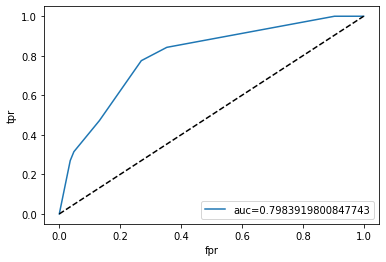

In [11]:
# Plot ROC chart for DT.Write your code below.
def roc(clf):
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc=4)
    plt.show()

roc(dt2)

In [12]:
# Adjust the decision tree parameters to improve the performance. Write your code below.

# Domain/Search Space
random_search = {
               'criterion': ['entropy', 'gini'],
               'max_depth': list(range(1,50)) + [None],
               'max_features': ['auto','sqrt','log2',None],
               'min_samples_leaf': list(range(1,50)),
               'min_samples_split': list(range(1,50))
                }


# training
clf = DecisionTreeClassifier()

dt3 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 200, 
                               cv = 4, verbose= 0, random_state= 101, n_jobs = -1)

dt3.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                     

In [13]:
dt3.best_params_

{'min_samples_split': 42,
 'min_samples_leaf': 20,
 'max_features': None,
 'max_depth': 38,
 'criterion': 'gini'}

In [14]:
print("Accuracy on training set: {:.3f}".format(dt3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt3.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.758


In [15]:
y_pred = dt3.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy 0.7578125
[[144  23]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.56      0.62        89

    accuracy                           0.76       256
   macro avg       0.74      0.71      0.72       256
weighted avg       0.75      0.76      0.75       256



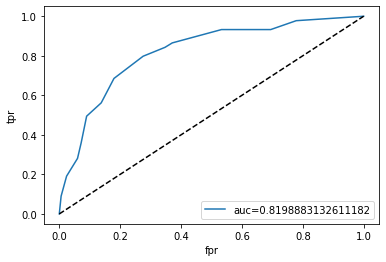

In [16]:
roc(dt3)

In [18]:
# get feature importance scores
clf = DecisionTreeClassifier(min_samples_split = dt3.best_params_['min_samples_split'] ,
                             min_samples_leaf = dt3.best_params_['min_samples_leaf'],
                             max_features = dt3.best_params_['max_features'],
                             max_depth = dt3.best_params_['max_depth'],
                             criterion = dt3.best_params_['criterion'])
clf.fit(X_train, y_train)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)

d={}

for i,j in zip(X_train.columns,feat_importance):
    d[i]=j
d

{'Pregnancies': 0.000739820075757569,
 'Glucose': 0.10453319712257564,
 'BloodPressure': 0.0,
 'SkinThickness': 0.0,
 'Insulin': 0.0,
 'BMI': 0.03475260063774668,
 'DiabetesPedigreeFunction': 0.01917684174865404,
 'Age': 0.018895311903148557}

# NN

In [19]:
# Feature Scaling
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [20]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=0)  
mlp1.fit(X_train, y_train)  

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, verbose=0)

In [21]:
print("Accuracy on training set: {:.3f}".format(mlp1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp1.score(X_test, y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.727


In [22]:
y_pred = mlp1.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy 0.7265625
[[135  32]
 [ 38  51]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       167
           1       0.61      0.57      0.59        89

    accuracy                           0.73       256
   macro avg       0.70      0.69      0.69       256
weighted avg       0.72      0.73      0.72       256



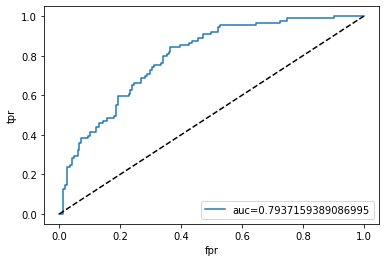

In [23]:
roc(mlp1)

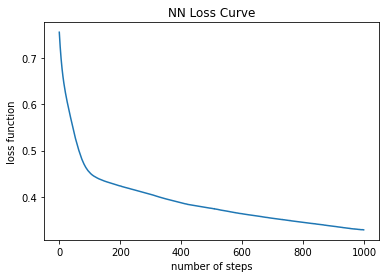

In [24]:
plt.plot(mlp1.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [25]:
# Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

# Input layer neurons (I) = 8
# Output layer neurons (O) = 1
# Rule of thumb says suitable number of neurons in hidden layer are:
# 1. H < 2*I or
# 2. H < 0.6*I + O or
# 3. I < H < O 

# Domain/Search Space
random_search = {
               'hidden_layer_sizes': [(7,7),(15,15),(64,64),(128,128),
                                     (7,7,7),(15,15,15),(64,64,64),(128,128,128)]
                }


# training
clf = MLPClassifier()

mlp2 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 1000, 
                               cv = 4, verbose= 0, random_state= 101, n_jobs = -1)

mlp2.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=MLPClassifier(), n_iter=1000, n_jobs=-1,
                   param_distributions={'hidden_layer_sizes': [(7, 7), (15, 15),
                                                               (64, 64),
                                                               (128, 128),
                                                               (7, 7, 7),
                                                               (15, 15, 15),
                                                               (64, 64, 64),
                                                               (128, 128,
                                                                128)]},
                   random_state=101)

In [27]:
print("Accuracy on training set: {:.3f}".format(mlp2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp2.score(X_test, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.738


In [28]:
y_pred = mlp2.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Accuracy 0.73828125
[[139  28]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       167
           1       0.64      0.56      0.60        89

    accuracy                           0.74       256
   macro avg       0.71      0.70      0.70       256
weighted avg       0.73      0.74      0.73       256



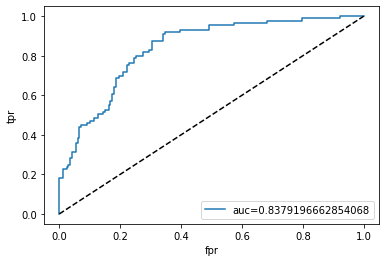

In [29]:
roc(mlp2)

In [30]:
clf = MLPClassifier(hidden_layer_sizes=mlp2.best_params_['hidden_layer_sizes'], max_iter=1000,verbose=0)  
clf.fit(X_train, y_train)  

MLPClassifier(hidden_layer_sizes=(7, 7), max_iter=1000, verbose=0)

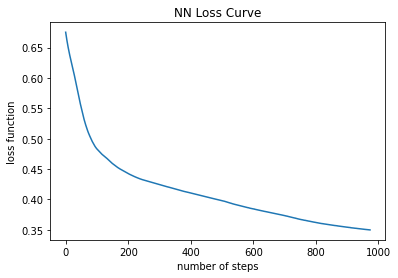

In [31]:
plt.plot(clf.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

# SVM

In [38]:
gamma1, gamma2 = 0.1, 1
C1, C2 = 10, 100
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train)
    svm_clfs.append(svm_clf)


for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  

r= 0.1 C= 10
Accuracy= 0.7109375
[[134  33]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       167
           1       0.59      0.54      0.56        89

    accuracy                           0.71       256
   macro avg       0.68      0.67      0.67       256
weighted avg       0.71      0.71      0.71       256

r= 0.1 C= 100
Accuracy= 0.6953125
[[130  37]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       167
           1       0.56      0.54      0.55        89

    accuracy                           0.70       256
   macro avg       0.66      0.66      0.66       256
weighted avg       0.69      0.70      0.69       256

r= 1 C= 10
Accuracy= 0.69921875
[[137  30]
 [ 47  42]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       167
           1       0.58      0.47      0.52        89

    accuracy  

# Deployment 

In [37]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp2, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

pred = loaded_model.predict(X_test)
print(pred)

[0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0]


# Additional code for your reference: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html